In [1]:
%matplotlib inline
from neurotools.nlab import *

Loading nlab namespace
<function decorator at 0x7f43f9271510>


# Rectangular coordinates test

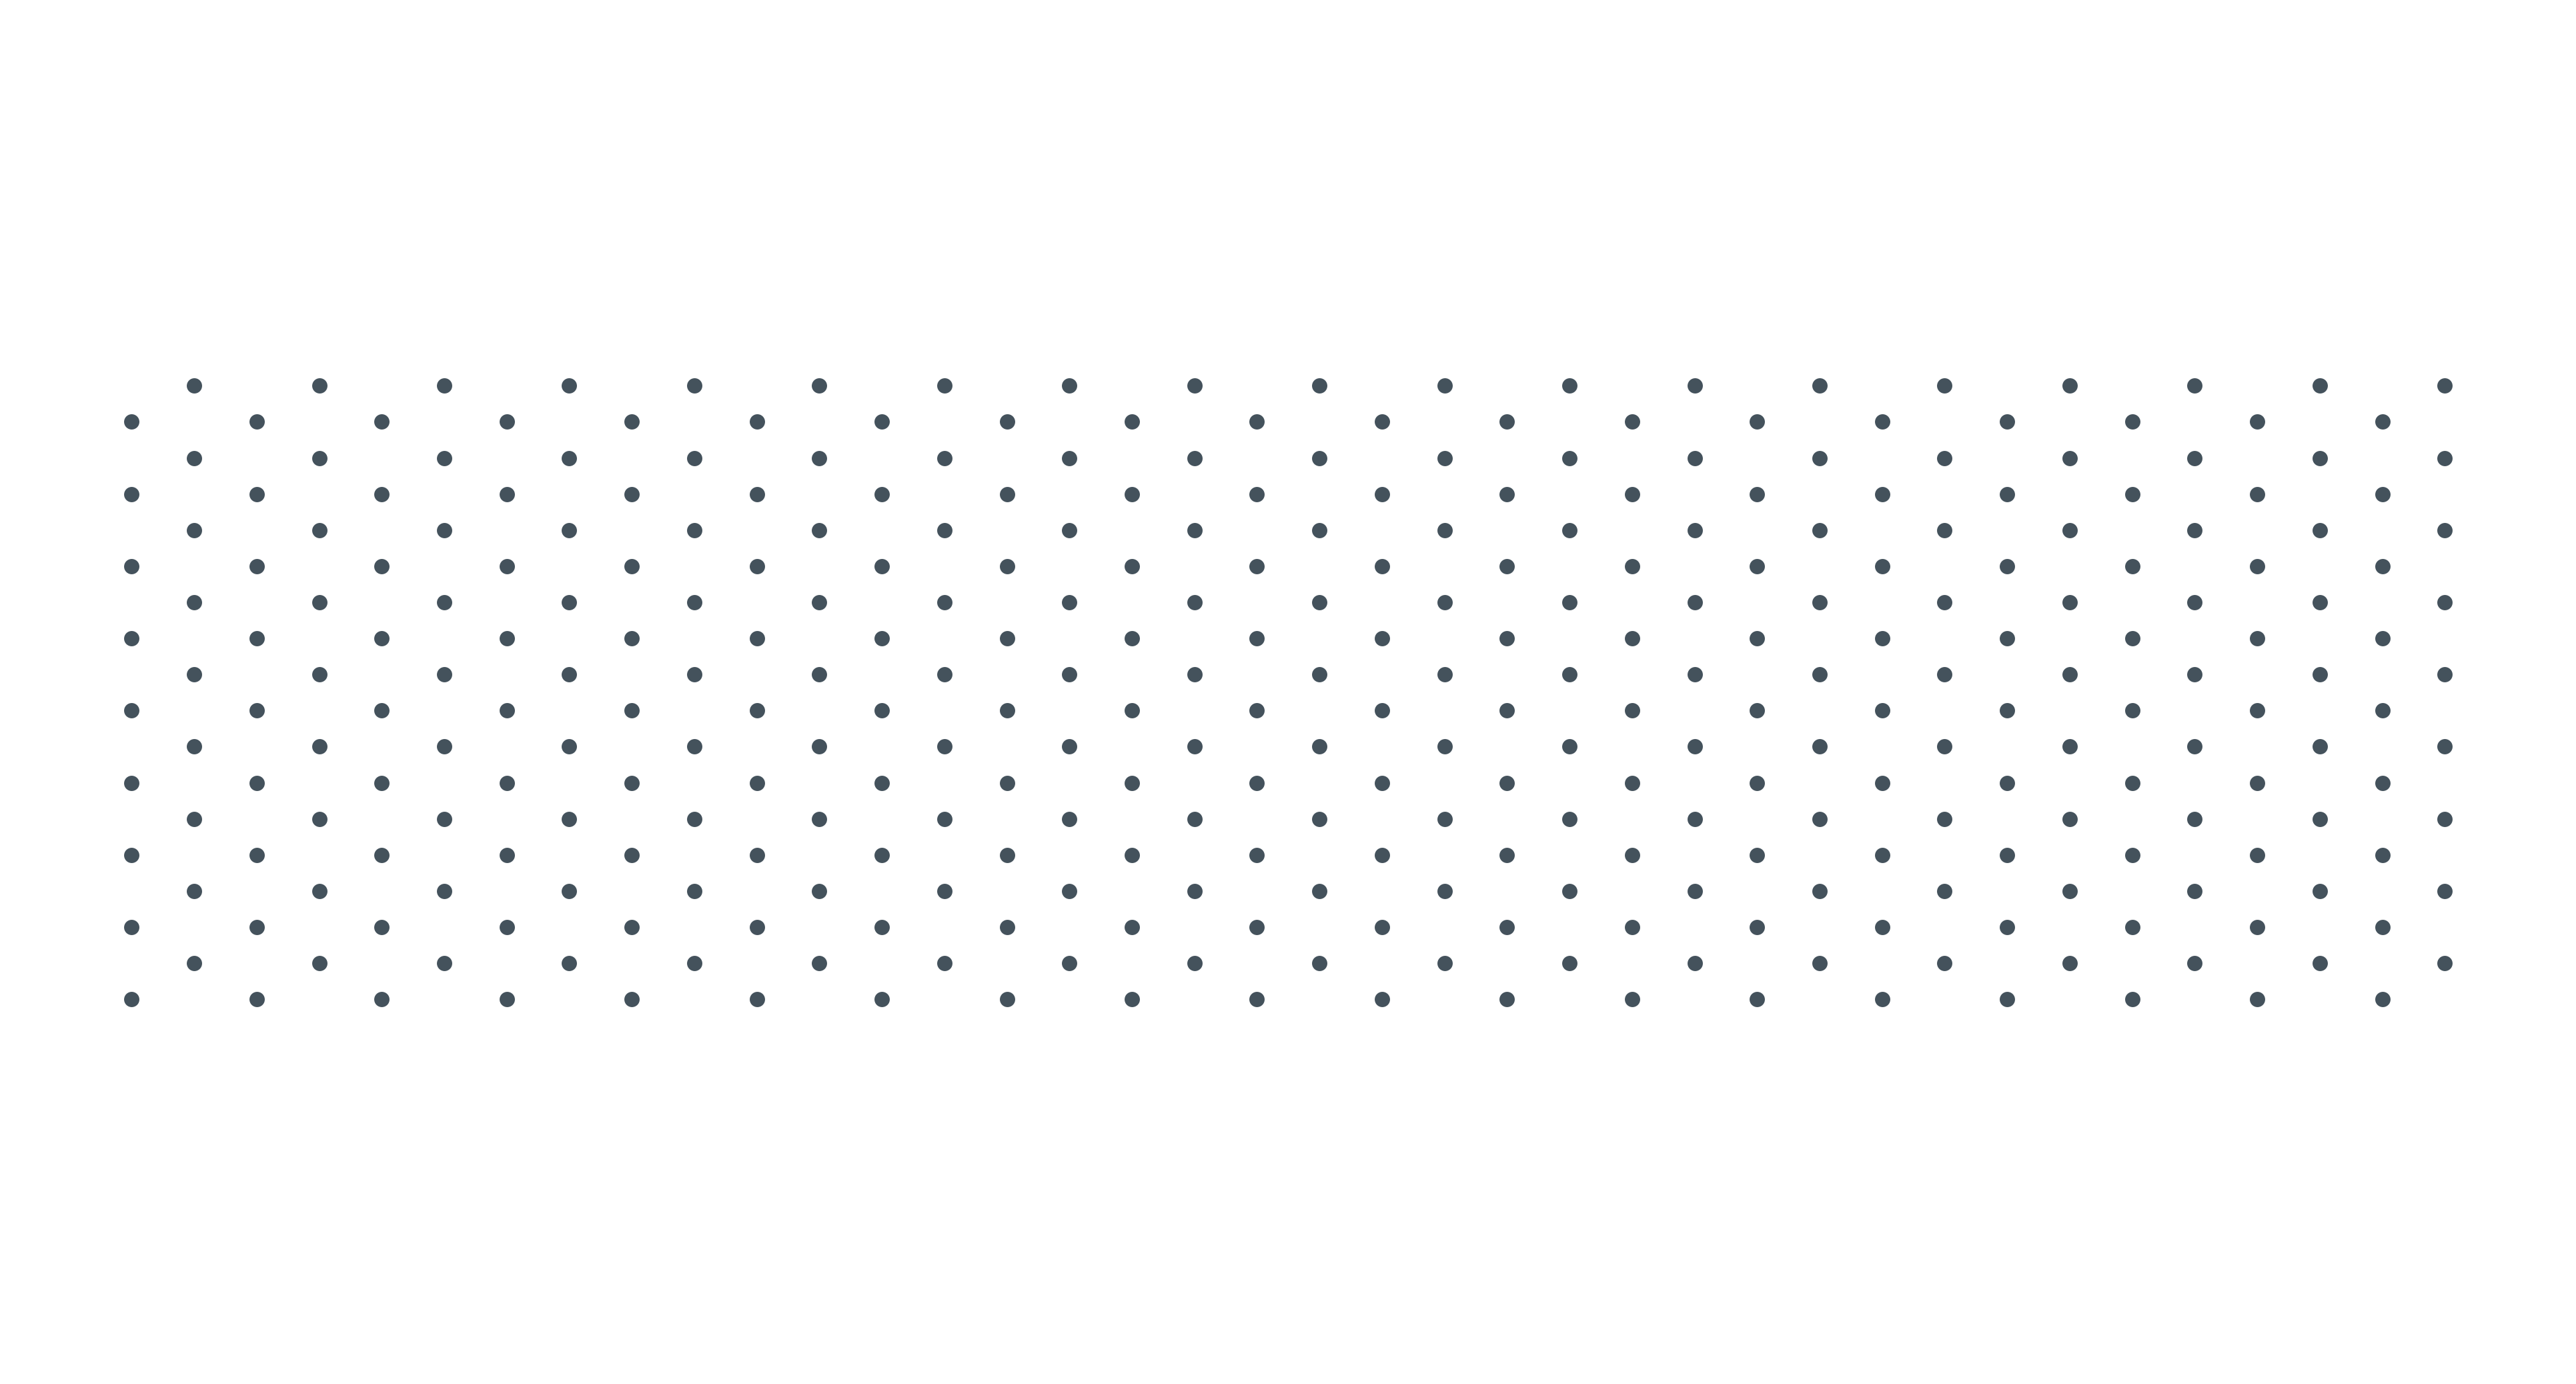

In [3]:
N = 19
M = N*(N-1)
cols = N-1
rows = N

figure(figsize=(rows*sqrt(3),cols),dpi=150)

for c in range(cols):
    x = arange(rows)*sqrt(3) + (sqrt(3)*0.5)*(c%2)
    y = ones(rows)*c*0.5
    scatter(x,y,s=100,color=BLACK)
    
axis('equal')
noxyaxes()

# Polar coordinate transformations

In [4]:
# Golden ratio
phi = (sqrt(5)-1)/2
print(phi)

0.6180339887498949


1.0067115724939846


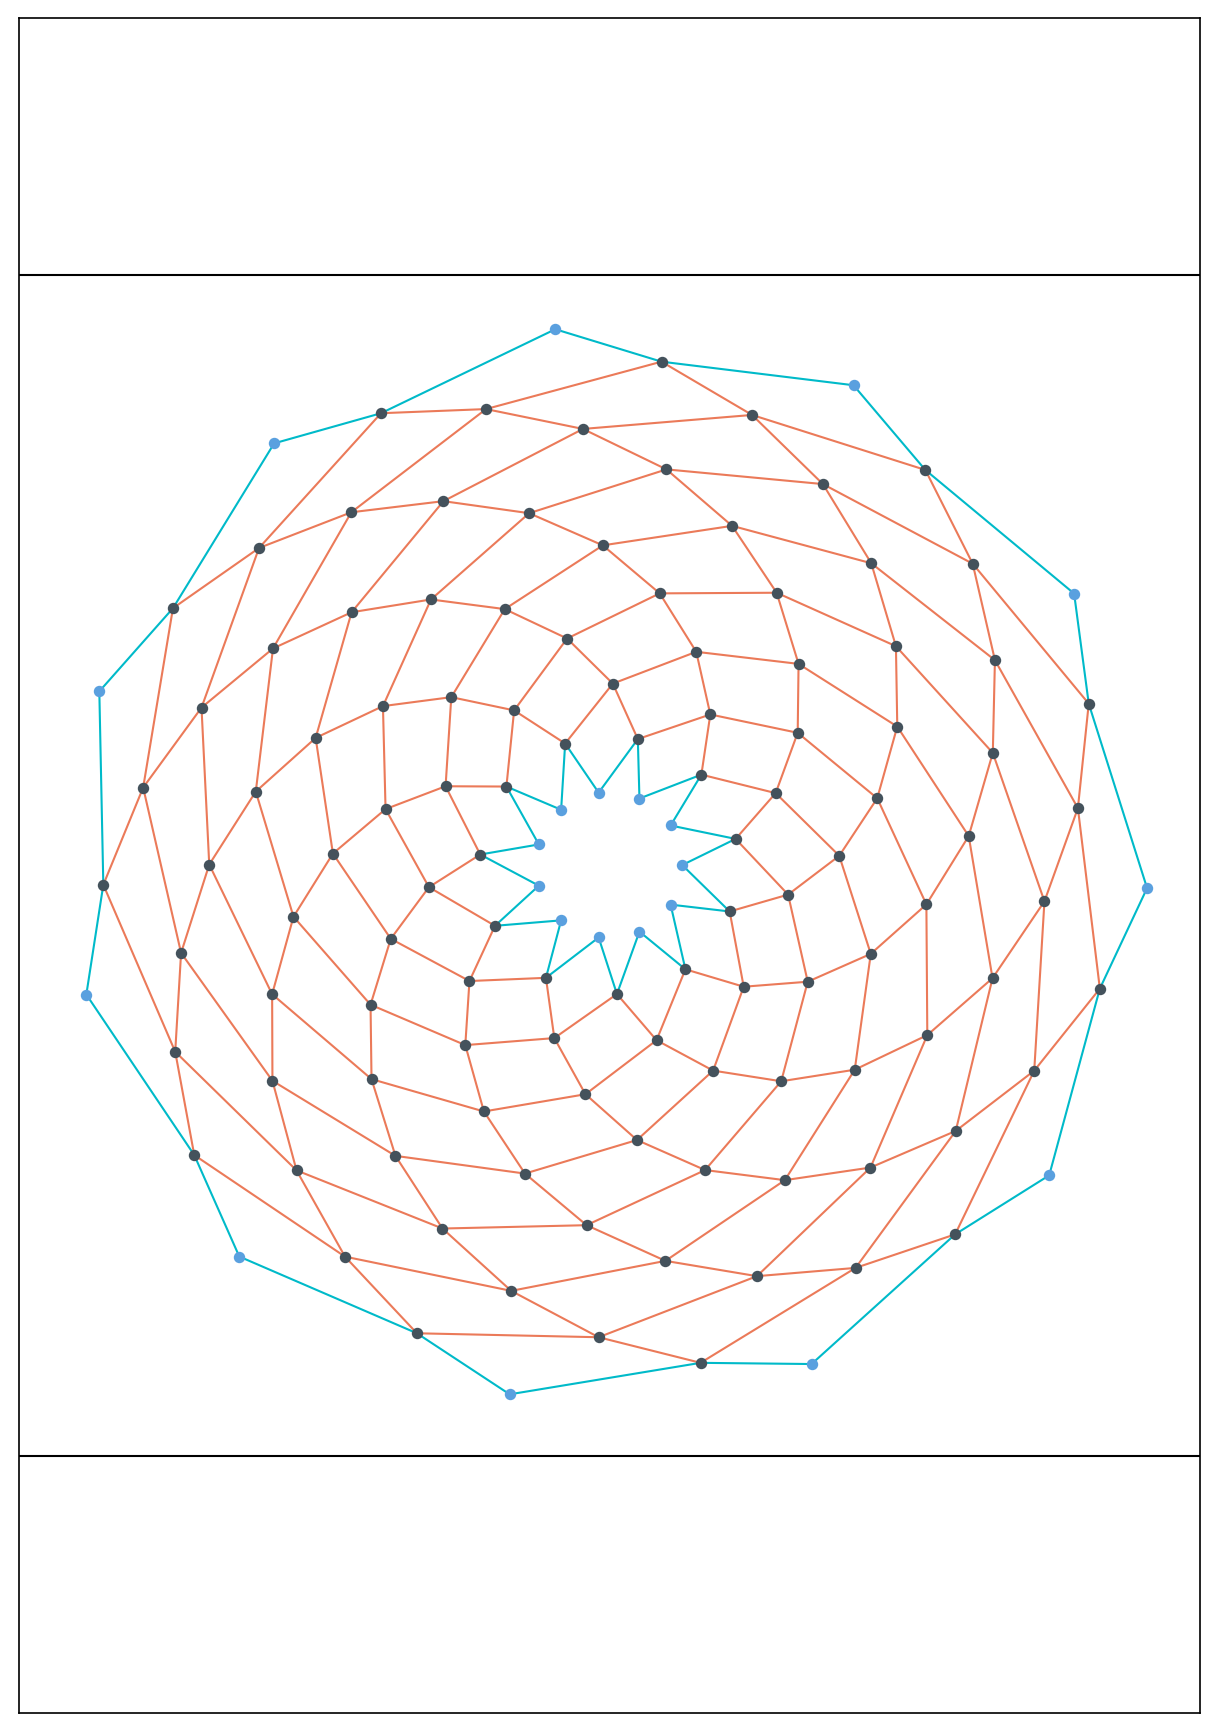

In [13]:
A4mm = array([210,297])
mmperinch = 25.4
size_in = A4mm/mmperinch
marginmm = 5
marginin = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
pagecenter = axissizecm/2
scale = 13

N = 11
M = N*(N-1)
cols = N-1+2
rows = N

figure(figsize=size_in,dpi=150)
mx,my = marginfraction
subplots_adjust(mx,my,1-mx,1-my,0,0)

vertices= []
edges   = []

for c in range(cols):
    x = arange(rows)*sqrt(3)# + (sqrt(3)*0.5)*(c%2)
    x += c*phi
    y = ones(rows)*c*0.5
    # polar transform
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    # Adjustment
    x,y = c2p(log(1+r+0.1)*exp(1j*theta))
    vv = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)*scale + pagecenter
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path).T
plot(*path.T[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*path.T[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*path.T[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vertices[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vertices[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vertices[-rows:].T,s=20,color=AZURE,zorder=10)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
axhline((axissizecm[1]-axissizecm[0])/2,color='k',lw=1)
axhline(axissizecm[1]-(axissizecm[1]-axissizecm[0])/2,color='k',lw=1)

#axis('equal')
#noxyaxes()
xticks([])
yticks([])
savefig('Sunflower_%d_%d_LEDs.pdf'%(N,N*(N-1)),facecolor='w',edgecolor='k',papertype='a4')

# If using 9mm beads, probably want at least 9+3=12 mm length at minimum
# Could use 6mm+3mm = 9mm minimum if have 6mm beads
lens = abs(p2c(diff((vertices)[edges],axis=1).squeeze().T))
print(np.min(lens))

# Split over 2 A4 sheets

16.732208246018228


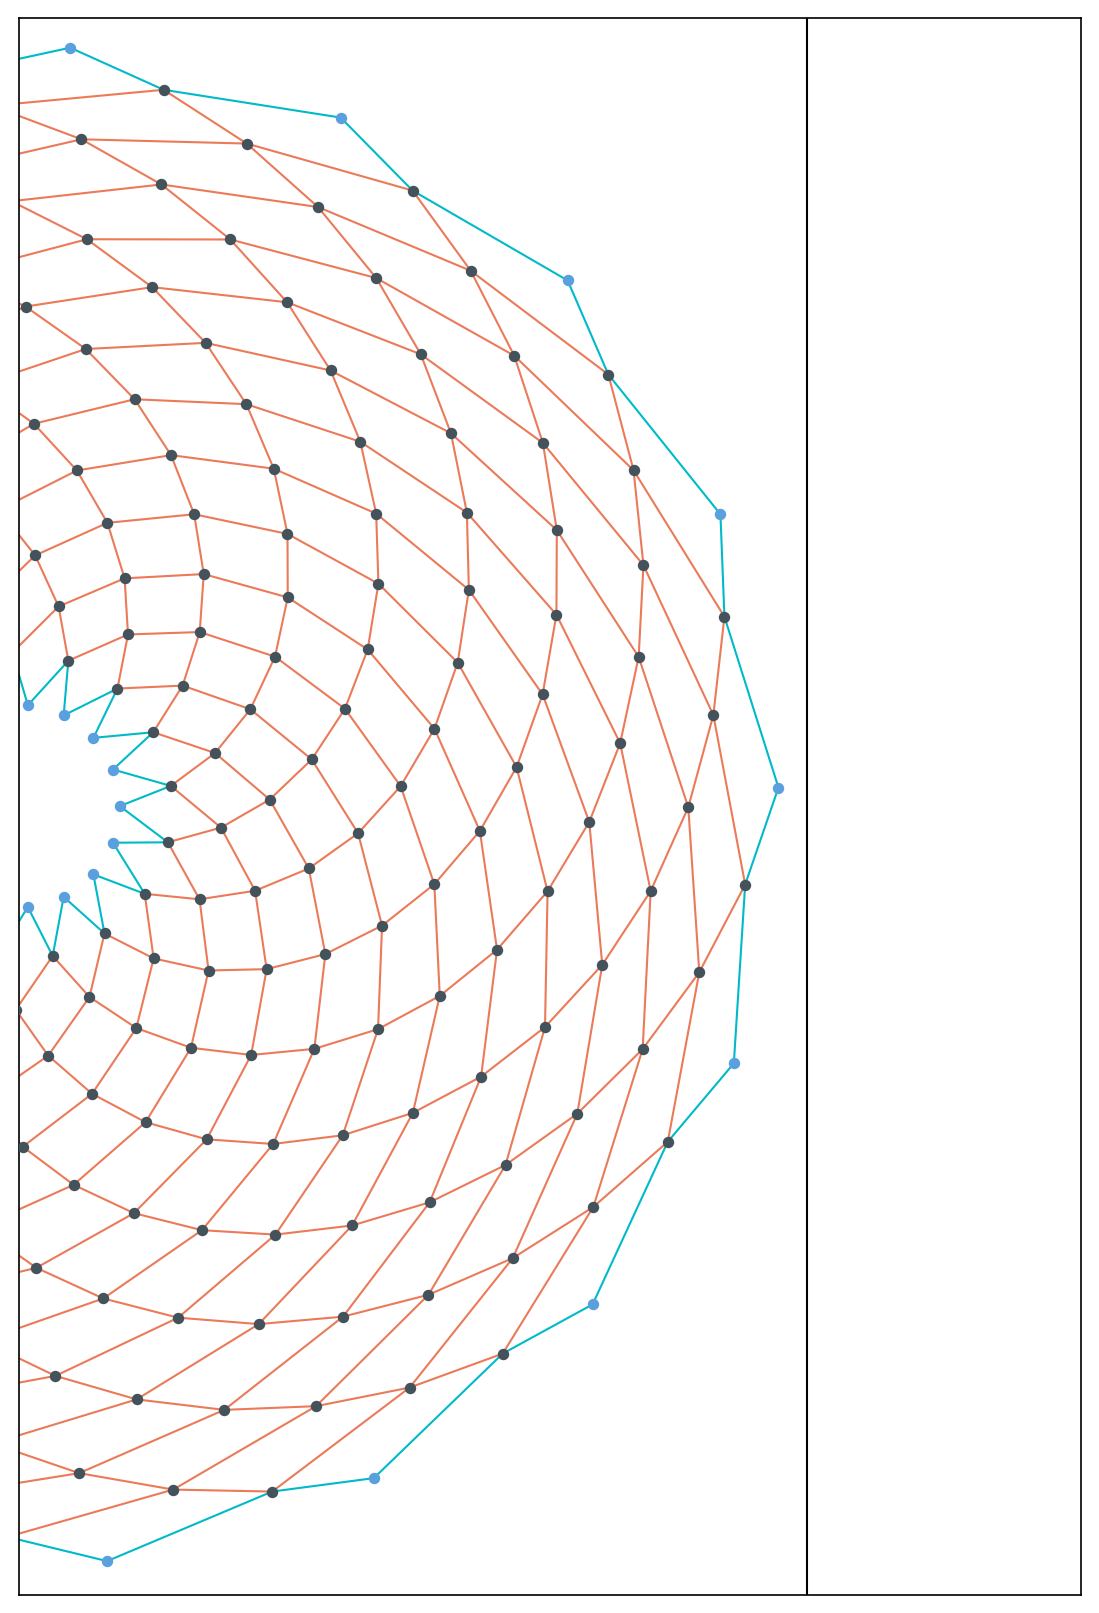

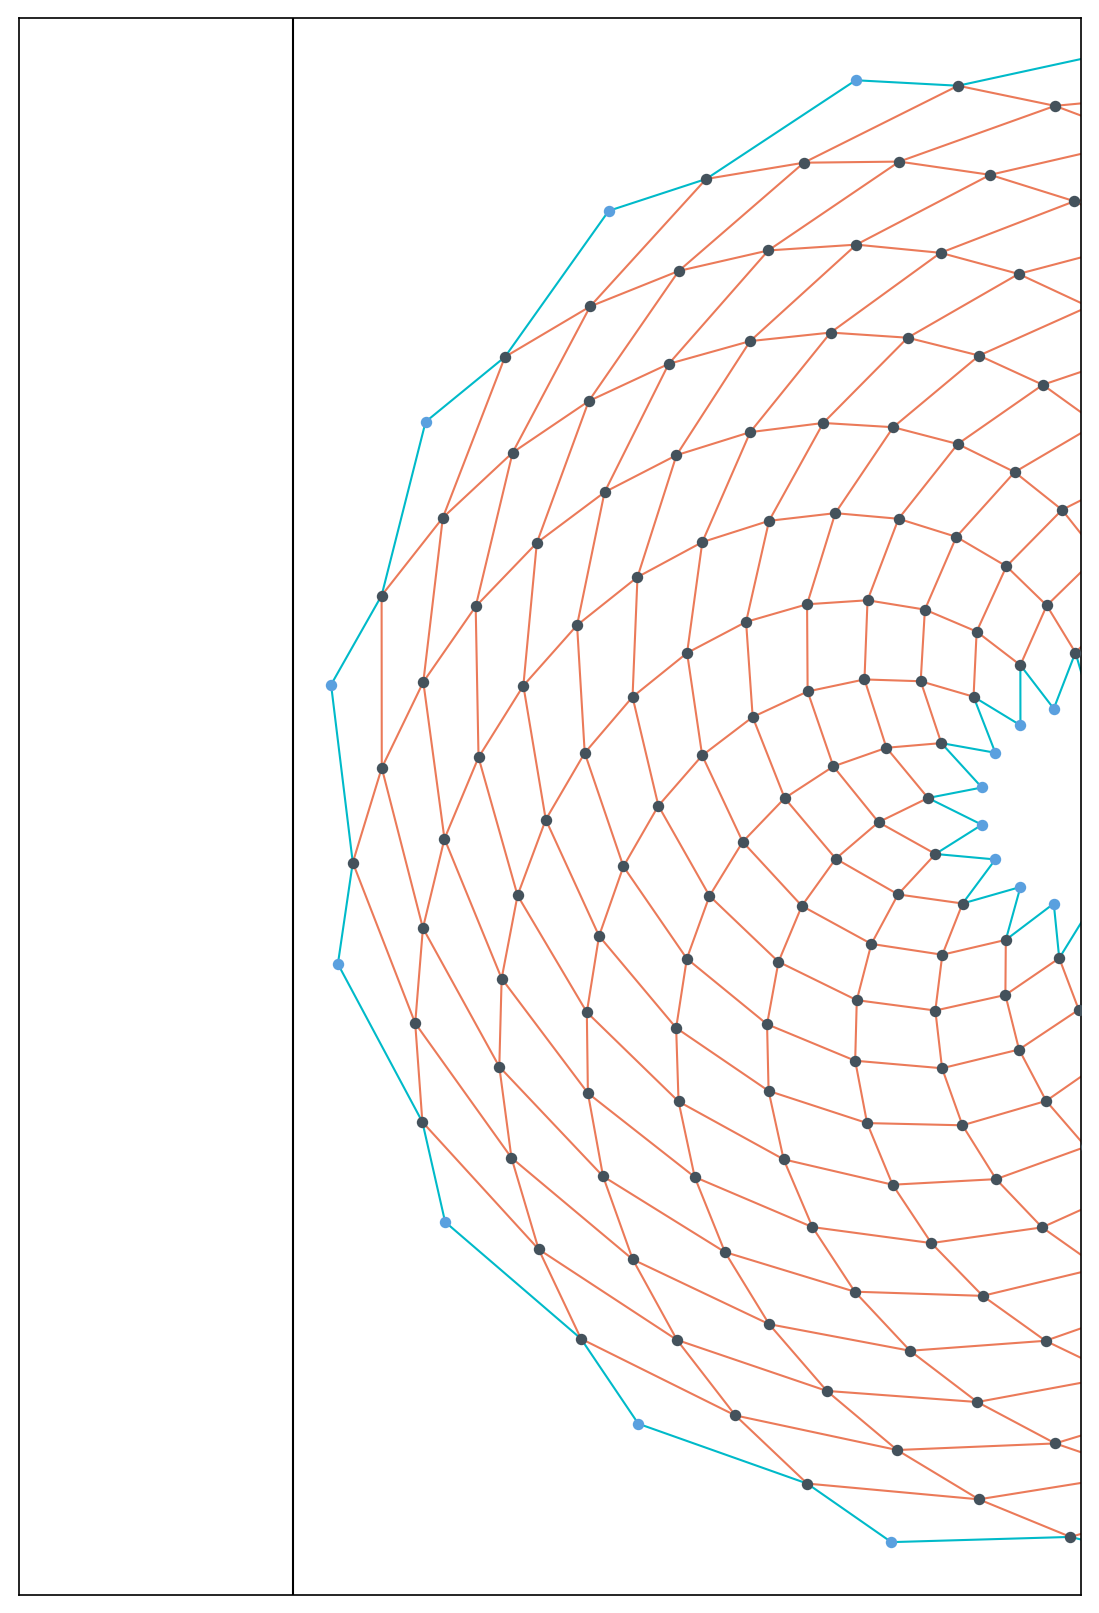

In [11]:
A4mm      = array([210,297])
mmperinch = 25.4
size_in   = A4mm/mmperinch
marginmm  = 15
marginin  = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
scale      = 18
mx,my      = marginfraction

N = 17
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []
for c in range(cols):
    x = arange(rows)*sqrt(3)+c*phi
    y = ones(rows)*c*0.5
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    x,y = c2p(log(1+r+0.1)*exp(1j*theta))
    vv  = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path)

# Right half
pagecenter = array([0,axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
axvline(axissizecm[1]/2,color='k',lw=1)
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefig('Sunflower_%d_%d_LEDs_right.pdf'%(N,N*(N-1)),facecolor='w',edgecolor='k',papertype='a4')

# Left Half
pagecenter = array([axissizecm[0],axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
axvline(axissizecm[0]-axissizecm[1]/2,color='k',lw=1)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefig('Sunflower_%d_%d_LEDs_left.pdf'%(N,N*(N-1)),facecolor='w',edgecolor='k',papertype='a4')

lens = abs(p2c(diff((vv*scale)[edges],axis=1).squeeze().T))
print(np.min(lens))

14.346776237588612


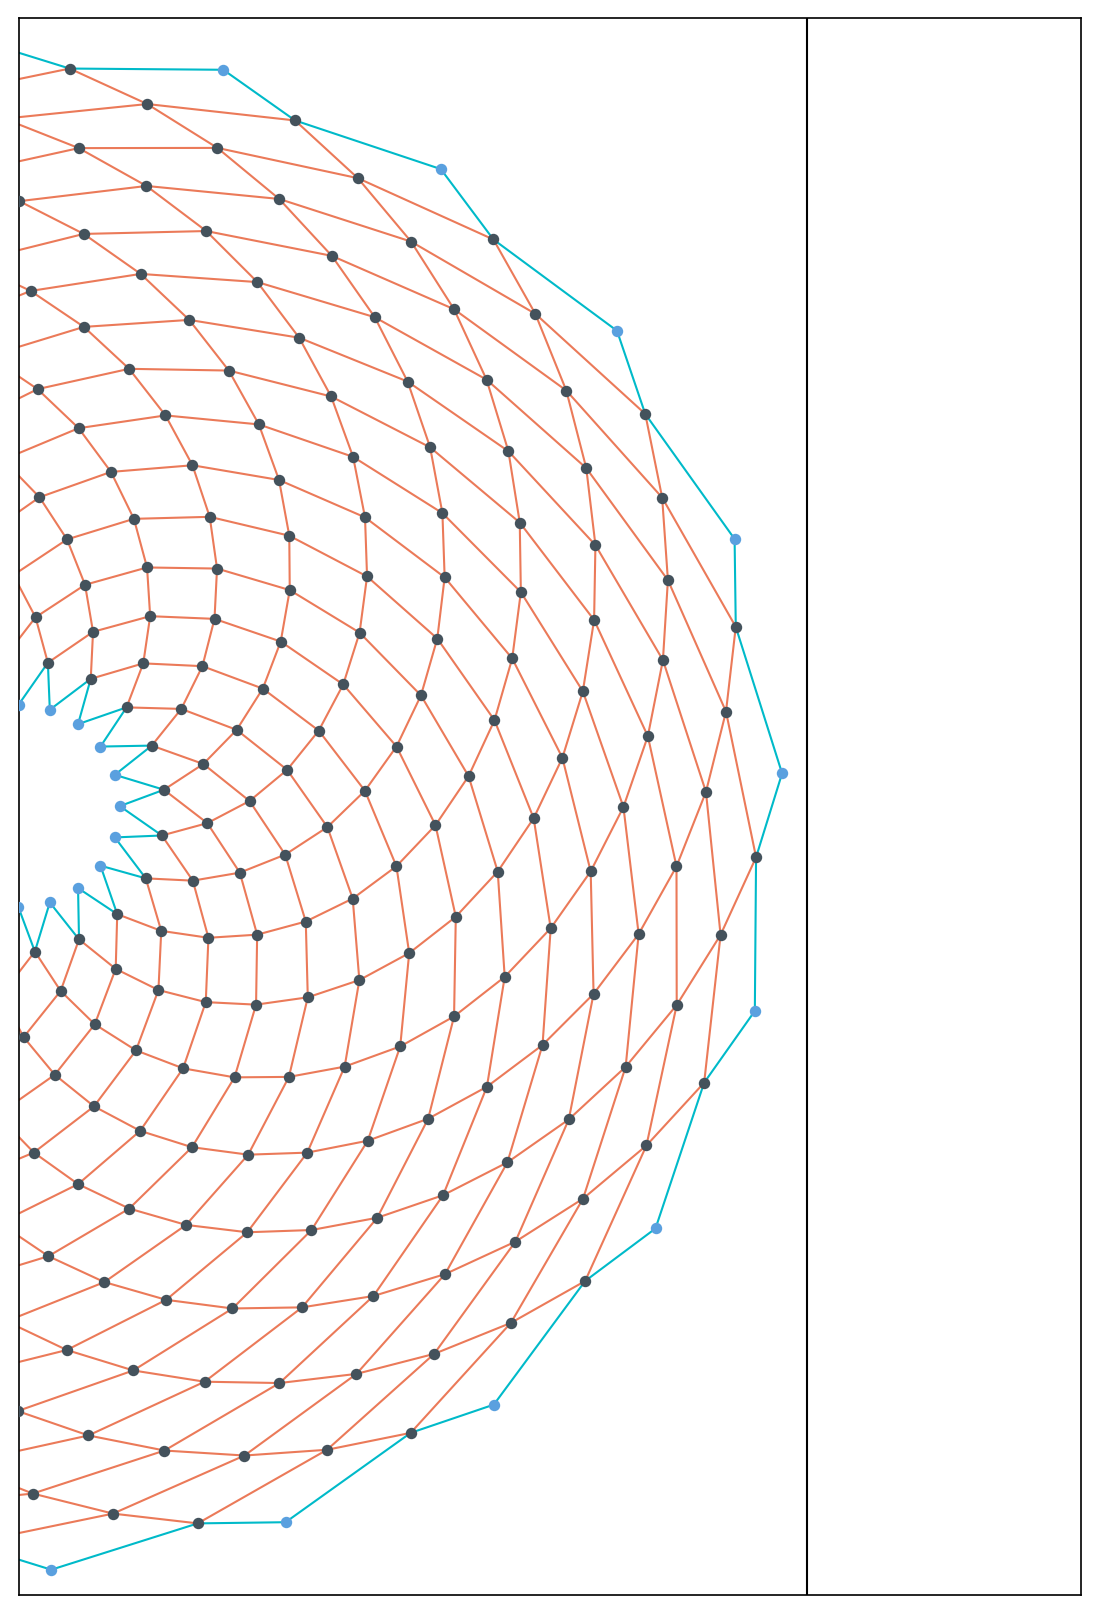

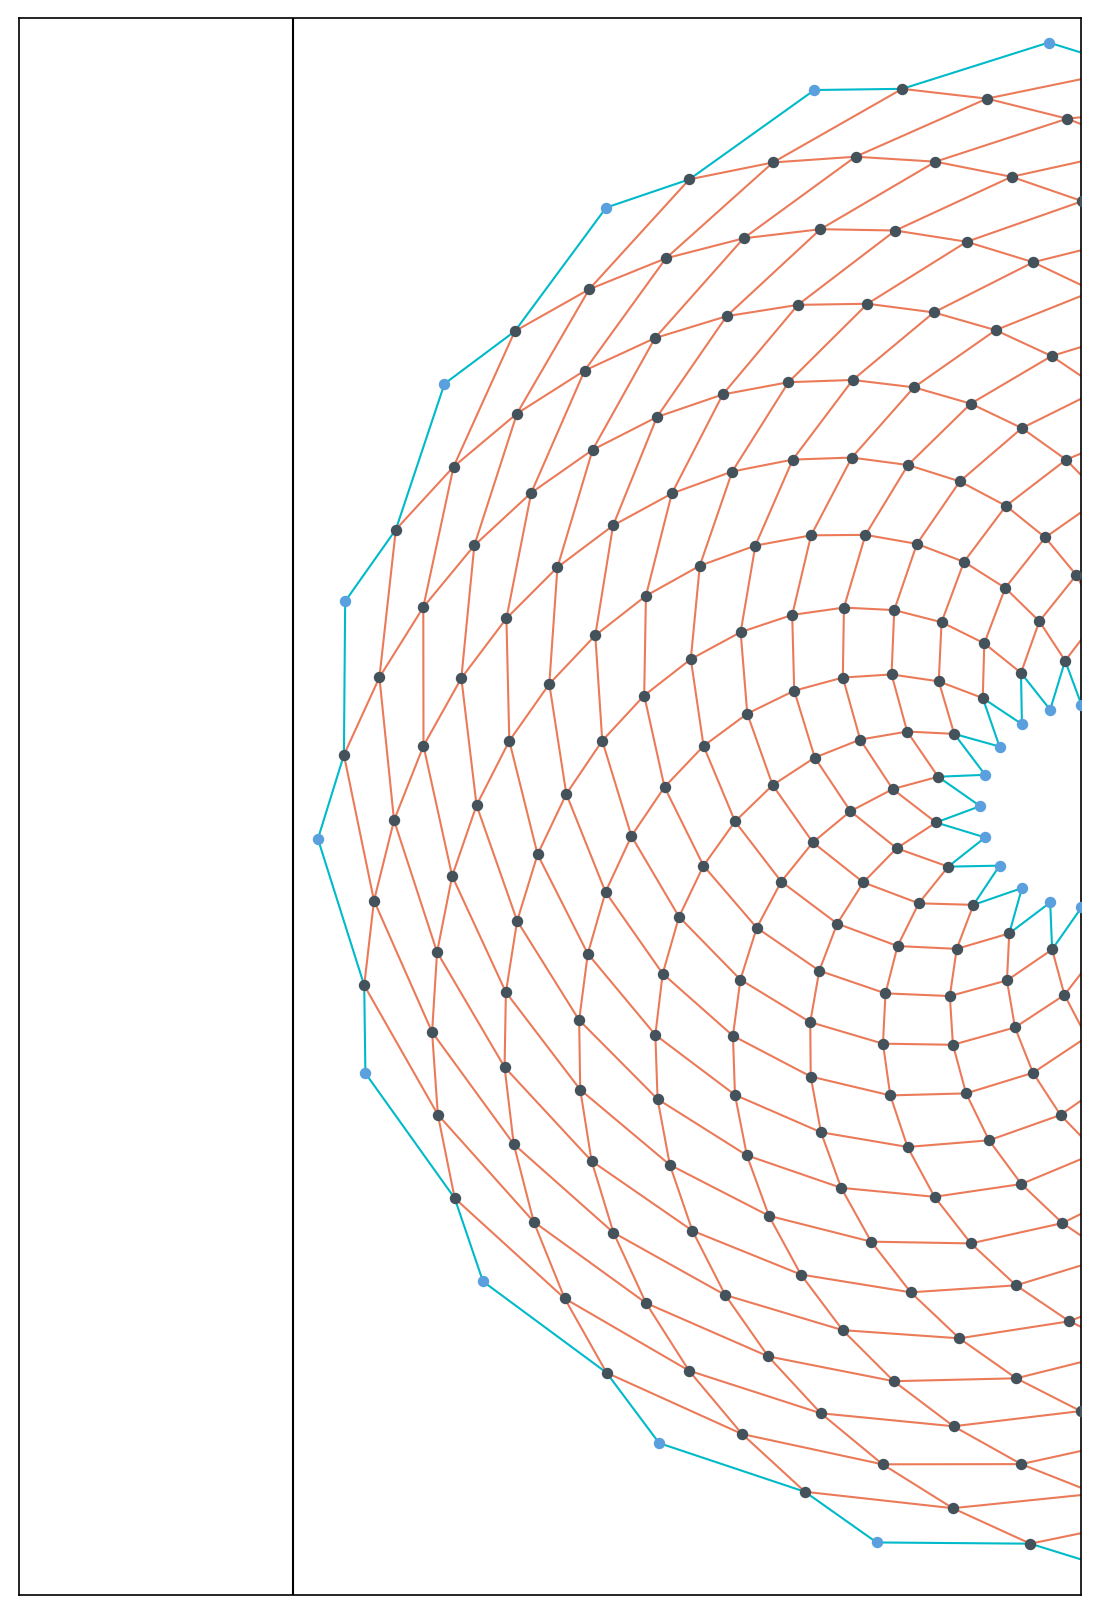

In [10]:
A4mm      = array([210,297])
mmperinch = 25.4
size_in   = A4mm/mmperinch
marginmm  = 15
marginin  = marginmm/mmperinch
marginfraction = marginin/size_in
axissizein = size_in - 2*marginin
axissizecm = axissizein*mmperinch/10
scale      = 18
mx,my      = marginfraction

N = 20
M = N*(N-1)
cols = N-1+2
rows = N

vertices= []
edges   = []
for c in range(cols):
    x = arange(rows)*sqrt(3)+c*phi
    y = ones(rows)*c*0.5
    theta = x/(rows*sqrt(3))*2*pi
    r     = y/cols*2
    x,y = c2p(log(1+r+0.1)*exp(1j*theta))
    vv  = array(list(zip(x,y)))
    vi0 = len(vertices)
    vertices.extend(vv)
    if c>0:
        ee = []
        for i in range(rows):
            j = (i-1)%rows
            ee += [(vi0+i-rows,vi0+i)]
            ee += [(vi0+i-rows,vi0+j)]
        edges.extend(ee)

# Build paths
edges    = int32(edges)
edges    = unique(edges,axis=0)
vertices = float32(vertices)
path = []
for v1,v2 in vertices[edges]:
    (x1,y1),(x2,y2) = v1,v2
    path += [(x1,y1),(x2,y2),(nan,nan)]
path = array(path)

# Right half
pagecenter = array([0,axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
axvline(axissizecm[1]/2,color='k',lw=1)
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefig('Sunflower_%d_%d_LEDs_right.pdf'%(N,N*(N-1)),facecolor='w',edgecolor='k',papertype='a4')

# Left Half
pagecenter = array([axissizecm[0],axissizecm[1]/2])
figure(figsize=size_in,dpi=150)
subplots_adjust(mx,my,1-mx,1-my,0,0)
pp = path    *scale + pagecenter
vv = vertices*scale + pagecenter
plot(*pp[rows*3*2:-rows*3*2].T,lw=1,color=RUST)
plot(*pp[:rows*3*2].T,lw=1,color =TURQUOISE)
plot(*pp[-rows*3*2:].T,lw=1,color=TURQUOISE)
scatter(*vv[rows:-rows].T,s=20,color=BLACK,zorder=10)
scatter(*vv[:rows].T,s=20,color=AZURE,zorder=10)
scatter(*vv[-rows:].T,s=20,color=AZURE,zorder=10)
axvline(axissizecm[0]-axissizecm[1]/2,color='k',lw=1)
xlim(0,axissizecm[0])
ylim(0,axissizecm[1])
xticks([])
yticks([])
savefig('Sunflower_%d_%d_LEDs_left.pdf'%(N,N*(N-1)),facecolor='w',edgecolor='k',papertype='a4')

lens = abs(p2c(diff((vv*scale)[edges],axis=1).squeeze().T))
print(np.min(lens))